<a href="https://colab.research.google.com/github/alscop/ESAA-25-2/blob/main/YB_1121_%EC%97%B0%EC%8A%B5%EB%AC%B8%EC%A0%9C_%EC%B0%A8%EC%9B%90%EC%B6%95%EC%86%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 데이터 로드
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1)

In [2]:
# train, test split
X_train = mnist['data'][:60000]
y_train = mnist['target'][:60000]
X_test = mnist['data'][60000:]
y_test = mnist['target'][60000:]

* 랜덤포레스트에 적용

In [4]:
# 랜덤포레스트에 적용 (n_estimators=10, random_state=42)
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
forest_clf.fit(X_train, y_train)
y_pred_forest = forest_clf.predict(X_test)

In [9]:
# 정확도 결과
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred_forest)
print('랜덤 포레스트 정확도:', accuracy)

랜덤 포레스트 정확도: 0.9492


# 1. PCA

* PCA로 변환한 데이터 세트에 랜덤 포레스트 적용

In [7]:
# PCA 라이브러리 불러오기
from sklearn.decomposition import PCA

In [8]:
# PCA 적용 95% : n_components=0.95
pca = PCA(n_components=0.95)

In [11]:
# PCA 이후 랜덤포레스트 훈련
X_train_pca = pca.fit_transform(X_train)

# 테스트 데이터 변환: 테스트 데이터는 훈련 데이터에서 학습한 PCA 모델(pca)을 그대로 사용하여 변환만 수행
X_test_pca = pca.transform(X_test)

forest_clf_pca = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
forest_clf_pca.fit(X_train_pca, y_train)
y_pred_forest_pca = forest_clf_pca.predict(X_test_pca)

In [12]:
# 정확도 결과 (X_test도 PCA 적용해야합니다.)
accuracy_pca = accuracy_score(y_test, y_pred_forest_pca)

print('PCA 적용 후 랜덤 포레스트 정확도:', accuracy_pca)

PCA 적용 후 랜덤 포레스트 정확도: 0.8925


원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수밖에 없음.

**관련 문제**

* PCA모델을 와인 데이터셋에 적용하여 차원을 축소하고 그 결과를 그래프로 나타내보세요.

(1) 필요한 모듈 불러오기

In [13]:
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

(2)  load_wine을 사용해 데이터셋을 생성한다.

In [26]:
wine = load_wine()
wine_df = pd.DataFrame(data = wine.data, columns=wine.feature_names)

In [28]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [32]:
print(wine_df.shape)

(178, 13)


(3) X에 표준 스케일링(Standard scaling)을 적용하여 X_scaled을 생성한다.

In [29]:
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_df)

(4) PCA 모델을 X에 적용하여 2개의 차원으로 추출한다. 단, random_state=1234로 설정한다.

In [45]:
#PCA 모델을 X_scaled에 적용하여 2개의 차원으로 추출한다.
pca = PCA(n_components=2, random_state=1234)

wine_pca = pca.fit_transform(wine_scaled)

print(wine_pca.shape)

(178, 2)


(5) 추출한 피처를 그래프로 나타내라.

In [39]:
# PCA 변환된 데이터의 칼럼명을 각각 pca_component_1, pca_component_2로 명명

pca_columns=['pca_component_1','pca_component_2']
wine_pca_df = pd.DataFrame(wine_pca, columns=pca_columns)

# 타켓 클래스 정보 추가 : 그래프에서 각 데이터 포인트의 색깔 구분에 사용
wine_pca_df['target']=wine.target
wine_pca_df.head(3)

,pca_component_1,pca_component_2,target
0,3.316751,1.443463,0
1,2.209465,-0.333393,0
2,2.516740,1.031151,0


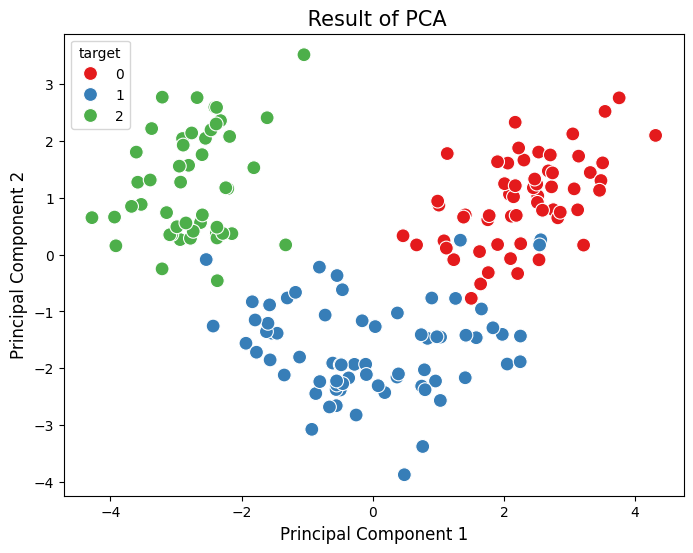

In [42]:
plt.figure(figsize = (8,6))

sns.scatterplot(
    x='pca_component_1',
    y='pca_component_2',
    hue='target',            # 타겟 변수를 기준으로 색상 구분
    palette='Set1',          # 색상 팔레트 지정
    data=wine_pca_df,
    legend='full',           # 범례 표시
    s=100                    # 마커 크기 조정
)

# 그래프 제목 및 축 라벨 설정
plt.title(' Result of PCA', fontsize=15)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)

plt.show()

일부 겹치나 비교적 잘 구분됨.

# 2. LDA

- LDA로 변환한 데이터 세트에 랜덤 포레스트 적용

In [14]:
# LDA 라이브러리 불러오기
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [15]:
# LDA 적용 : n_components=5
lda = LinearDiscriminantAnalysis(n_components=5)

In [17]:
# LDA 이후 랜덤포레스트 훈련
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

forest_clf_lda = RandomForestClassifier(n_estimators=10, random_state =42, n_jobs=-1)
forest_clf_lda.fit(X_train_lda, y_train)
y_pred_forest_lda = forest_clf_lda.predict(X_test_lda)

In [19]:
# 정확도 결과 (X_test도 LDA 적용해야합니다.)
accuracy_lda = accuracy_score(y_test, y_pred_forest_lda)
print('LDA 적용 후 랜덤 포레스트 정확도:', accuracy_lda)

LDA 적용 후 랜덤 포레스트 정확도: 0.8301
